In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/dengue_long.csv')
df.head()

,Year,Week,District,Cases
0,2019,24,101 TAPLEJUNG,NaN
1,2019,25,101 TAPLEJUNG,NaN
2,2019,26,101 TAPLEJUNG,NaN
3,2019,27,101 TAPLEJUNG,NaN
4,2019,28,101 TAPLEJUNG,NaN


In [5]:
df.shape

(25179, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25179 entries, 0 to 25178
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      25179 non-null  int64  
 1   Week      25179 non-null  int64  
 2   District  25179 non-null  object 
 3   Cases     6285 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 787.0+ KB


In [21]:
df.describe()

,Year,Week,Cases
count,25179.000000,25179.000000,25179.000000
mean,2022.220183,27.801223,3.822511
std,1.906206,14.708055,29.845240
min,2019.000000,1.000000,0.000000
25%,2021.000000,15.000000,0.000000
50%,2022.000000,29.000000,0.000000
75%,2024.000000,40.000000,0.000000
max,2025.000000,52.000000,1544.000000


### Handling Missing Values

In [9]:
df.isna().sum()

Year            0
Week            0
District        0
Cases       18894
dtype: int64

In [12]:
#Replace the NaN values with 0
df= df.fillna(0)
df.head()

,Year,Week,District,Cases
0,2019,24,101 TAPLEJUNG,0.0
1,2019,25,101 TAPLEJUNG,0.0
2,2019,26,101 TAPLEJUNG,0.0
3,2019,27,101 TAPLEJUNG,0.0
4,2019,28,101 TAPLEJUNG,0.0


### Temporal Analysis

In [44]:
# Aggregate data to show the national trend over time

# national_trend = df.groupby(['Year', 'Week'])['Cases'].sum().reset_index()
# national_trend

national_trend = df.groupby('Year')['Cases'].sum().reset_index()
national_trend


,Year,Cases
0,2019,11040.0
1,2020,438.0
2,2021,422.0
3,2022,24175.0
4,2023,25775.0
5,2024,27859.0
6,2025,6538.0


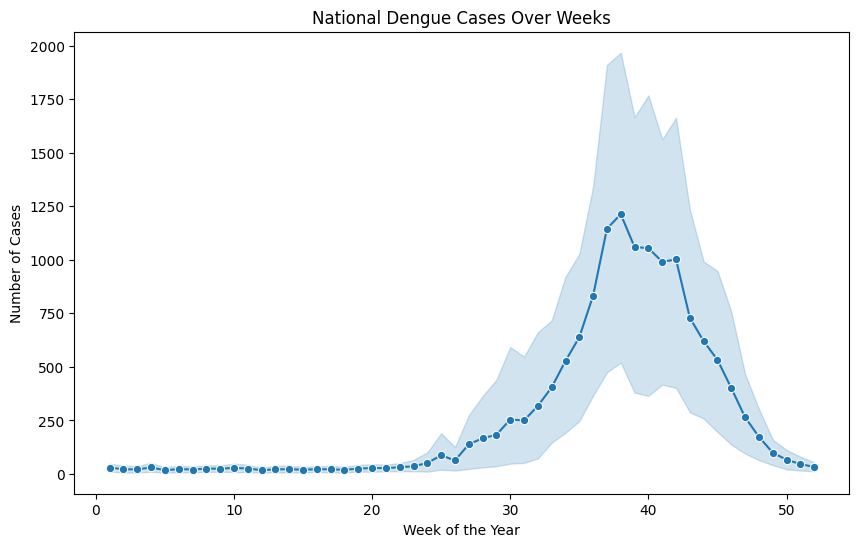

In [ ]:
# Visualize national_trend
plt.figure(figsize=(10,6))
sns.lineplot(data=national_trend, x='Week', y='Cases', marker='o')
plt.title('National Dengue Cases Over Weeks')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')
plt.show()

In [35]:
# Useful if you need to temporarily switch back to a wide format to calculate correlations between districts.
outbreak_pivot = df.pivot_table(index='Year', columns='District', values='Cases', aggfunc='sum', fill_value=0)
outbreak_pivot

District,101 TAPLEJUNG,102 SANKHUWASABHA,103 SOLUKHUMBU,104 OKHALDHUNGA,105 KHOTANG,106 BHOJPUR,107 DHANKUTA,108 TERHATHUM,109 PANCHTHAR,110 ILAM,...,610 SURKHET,701 BAJURA,702 BAJHANG,703 DARCHULA,704 BAITADI,705 DADELDHURA,706 DOTI,707 ACHHAM,708 KAILALI,709 KANCHANPUR
Year,,,,,,,,,,,,,,,,,,,,,
2019,2.0,3.0,0.0,3.0,0.0,1.0,4.0,0.0,7.0,10.0,...,15.0,0.0,0.0,17.0,3.0,2.0,0.0,7.0,37.0,19.0
2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,40.0,1.0,0.0,5.0,6.0,23.0,11.0,30.0,26.0,1.0
2021,1.0,0.0,0.0,12.0,2.0,0.0,0.0,0.0,0.0,1.0,...,2.0,1.0,8.0,4.0,0.0,18.0,5.0,6.0,42.0,3.0
2022,13.0,341.0,18.0,25.0,252.0,45.0,134.0,159.0,78.0,97.0,...,345.0,11.0,23.0,346.0,37.0,51.0,68.0,41.0,260.0,209.0
2023,27.0,1149.0,2.0,69.0,64.0,367.0,352.0,220.0,566.0,202.0,...,93.0,80.0,64.0,266.0,38.0,44.0,34.0,223.0,271.0,161.0
2024,5.0,176.0,4.0,185.0,30.0,130.0,33.0,33.0,95.0,48.0,...,156.0,24.0,20.0,58.0,37.0,175.0,98.0,156.0,346.0,155.0
2025,5.0,150.0,2.0,109.0,74.0,33.0,14.0,2.0,46.0,2.0,...,395.0,21.0,96.0,32.0,3.0,185.0,28.0,92.0,146.0,63.0


### Comparative Analysis

In [ ]:
# create a column that sums up the cases for each district
cases_by_district = df.groupby('District')['Cases'].sum().reset_index()
cases_by_district

,District,Cases
0,101 TAPLEJUNG,53.0
1,102 SANKHUWASABHA,1819.0
2,103 SOLUKHUMBU,26.0
3,104 OKHALDHUNGA,403.0
4,105 KHOTANG,422.0
...,...,...
72,705 DADELDHURA,498.0
73,706 DOTI,244.0
74,707 ACHHAM,555.0
75,708 KAILALI,1128.0


In [45]:
# List top five districts with highest dengue cases
top_districts = cases_by_district.sort_values(by='Cases', ascending=False)
top_districts.head(20)

,District,Cases
27,306 KATHMANDU,22184.0
39,405 KASKI,10389.0
29,308 LALITPUR,7036.0
12,113 SUNSARI,5822.0
53,508 RUPANDEHI,5276.0
25,304 DHADING,4413.0
41,407 TANAHU,3956.0
34,313 CHITAWAN,3272.0
28,307 BHAKTAPUR,2664.0
51,506 PALPA,1856.0


In [22]:
# Creates a heat-map-ready table showing which districts had outbreaks in which years.
outbreak_pivot = df.pivot_table(index='District', columns='Year', values='Cases', aggfunc='sum', fill_value=0)
outbreak_pivot

Year,2019,2020,2021,2022,2023,2024,2025
District,,,,,,,
101 TAPLEJUNG,2.0,0.0,1.0,13.0,27.0,5.0,5.0
102 SANKHUWASABHA,3.0,0.0,0.0,341.0,1149.0,176.0,150.0
103 SOLUKHUMBU,0.0,0.0,0.0,18.0,2.0,4.0,2.0
104 OKHALDHUNGA,3.0,0.0,12.0,25.0,69.0,185.0,109.0
105 KHOTANG,0.0,0.0,2.0,252.0,64.0,30.0,74.0
...,...,...,...,...,...,...,...
705 DADELDHURA,2.0,23.0,18.0,51.0,44.0,175.0,185.0
706 DOTI,0.0,11.0,5.0,68.0,34.0,98.0,28.0
707 ACHHAM,7.0,30.0,6.0,41.0,223.0,156.0,92.0
